# **Dependencies**

In [0]:
pip install qiskit-terra[visualization]

In [0]:
import qiskit as qk

In [0]:
import matplotlib.pyplot as plt


# **Creating the quantum bits & classical bits**

In [0]:
qb = qk.QuantumRegister(2)
cb = qk.ClassicalRegister(2)

# **Creating the circuit**

In [20]:
quantumCircuit = qk.QuantumCircuit(qb,cb)
quantumCircuit.draw()

q0_0: 
      
q0_1: 
      
c0_0: 
      
c0_1:

We will be focusing on the following gates:


1.   Hadamard Gate
2.   Controlled-NOT Gate

### Entanglement creation

In order to create entanglement, we need to introduce the Hadamard Gate on the first quantum bit. The Hadamard Gate recieves an single quantum bit input, and outputs a bit with 50% probability of being either 0 or 1

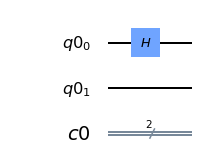

In [21]:
quantumCircuit.h(qb[0])
quantumCircuit.draw(output='mpl')

Applying the Controlled-NOT Gate, where the control quantum bit is the 1st Qubit, while the target quantum bit is the 2nd Qubit. The CNOT Gate flips the Qubit from ket 0 to ket 1 *iff* the control Qubit is ket 1.

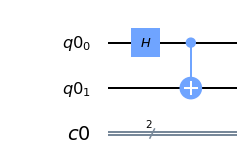

In [22]:
quantumCircuit.cx(qb[0],qb[1])
quantumCircuit.draw(output='mpl')

With these 2 simple operations, we an now measure the Qubits, and store these measurements into the classical bits register

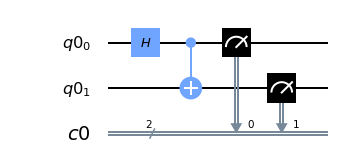

In [23]:
quantumCircuit.measure(qb,cb)
quantumCircuit.draw(output='mpl')

# **Running the quantum circuit**

## Simulation
We first run a simulation of the circuit using Aer's *QasmSimulator* (Quantum assembly

In [0]:
simulator = qk.BasicAer.get_backend('qasm_simulator')

Execute the quantum circuit that was built previously using the *QasmSimulator* as the backend.

In [0]:
result = qk.execute(quantumCircuit, backend=simulator).result()

In [0]:
from qiskit.tools.visualization import plot_histogram

###Visualization of simulation results using a histogram

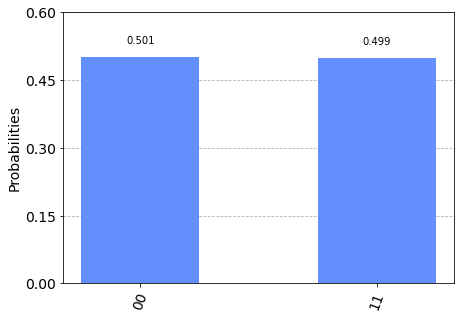

In [28]:
counts = result.get_counts(quantumCircuit)
plot_histogram(counts)

## Connecting to an IBM quantum computer
First, you would have to create an account with IBM quantum experience. Generate an API at your *'My Account'* page at the top right. Afterwhich, you can choose a backend that is being allocated to your account (depending on location, IBM allocates the nearest quantum computer to you) For me, I chose the **'ibmq_qasm_simulator'** backend system which can hold and manipulate up to a maximum of 32 qubits. 

In [0]:
def ibmAccountLogin(API):
  qk.IBMQ.save_acount(API)
  qk.IBMQ.load_account()

### Account Login

In [42]:
ibmAccountLogin('2ff99e084b692bc528467d5735476a3df7b1147e60c33c0d216e1a23447abe32139183445b7c70b2106d7559afa9a2a7edd132ab0678177167fe985bc454fd3e')

configrc.store_credentials:WARNING:2020-04-15 03:49:34,131: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2020-04-15 03:49:34,892: Credentials are already in use. The existing account in the session will be replaced.


### Choose Provider

In [0]:
provider = qk.IBMQ.get_provider('ibm-q')

### Choose Backend

In [0]:
backend = provider.get_backend('ibmq_qasm_simulator')

### Allocate job to quantum computer

In [0]:
job = qk.execute(quantumCircuit, backend = backend)

In [0]:
from qiskit.tools.monitor import job_monitor

Depending on how busy the quantum backend servers are at that time, the job status may vary from "queued" to "successfully run"

In [51]:
job_monitor(job)

Job Status: job has successfully run


### Actual results visualization
Notice the difference between the actual results and simulation. Figure out why! 

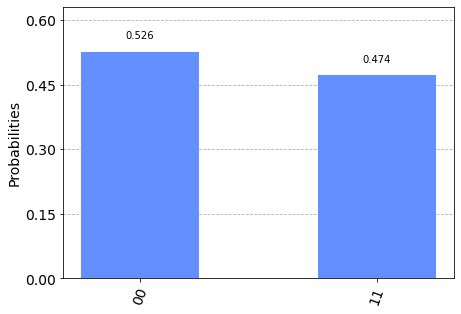

In [52]:
result = job.result()
plot_histogram(result.get_counts(quantumCircuit))

# **Quantum Teleportation**

## Creating Qubits and Classical bits
We create 3 Qubits and 3 Classical bits

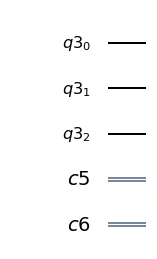

In [188]:
qr = qk.QuantumRegister(3)
crz = qk.ClassicalRegister(1)
crx = qk.ClassicalRegister(1)
circuit = qk.QuantumCircuit(qr,crz,crx)
circuit.draw(output = 'mpl')

 ## Initializing Initial State
 We shall perform a simple initialization by transforming the initial state of Qubit_0, which is |0>, to ket |1>, by simply applying a X gate

In [0]:
import numpy as np
from qiskit.extensions import Initialize
import math

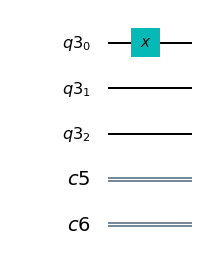

In [189]:
#psi = [0.+1.j/math.sqrt(2),1/math.sqrt(2)+0.j]
#circuit.initialize(psi, [0])
circuit.x(0)
circuit.draw(output='mpl')


## Entanglement Creation

1.   We first create a hadamard gate on the Qubit_1. This transfers Qubit_1 into the X-basis  ( |+⟩  and  |−⟩ ).
2.    Then, a CNOT gate (control = Qubit_1, target = Qubit_2). 

This method is known as creating a Bell pair. 



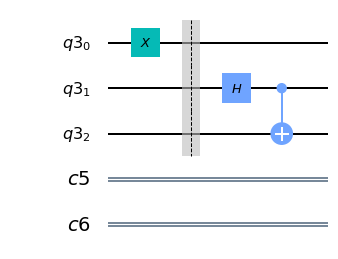

In [190]:
def bell_pair(circuit,a,b):
  circuit.barrier()
  circuit.h(a)
  circuit.cx(a,b)


bell_pair(circuit,1,2)
circuit.draw(output='mpl')

Another CNOT gate (control = Qubit_0, target= Qubit_1). And another hadamard gate on Qubit_0.

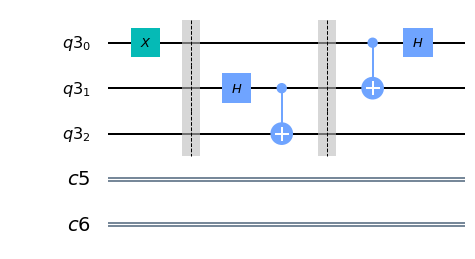

In [191]:
def psiControl(circuit,psi,a):
  circuit.barrier()
  circuit.cx(psi,a)
  circuit.h(psi)

psiControl(circuit,0,1)
circuit.draw(output='mpl')

## Storage of measurements
Storing the measurements of Qubit_0 and Qubit_1 into the respective classical registers

Since only 2 bits are being measured, we can have 4 possible classical bits outcomes: 

1.   00
2.   01
3.   10
4.   11



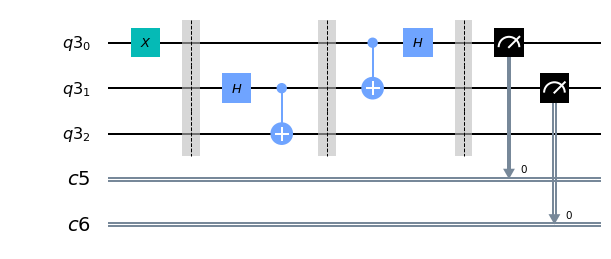

In [192]:
def measureStorage(circuit,a,b):
  '''
  Measuring Qubit a and Qubit b, and storing the result in 2 classical bits
  '''
  circuit.barrier()
  circuit.measure([a,b],[0,1])
  circuit.draw(output='mpl')

measureStorage(circuit,0,1)
circuit.draw(output='mpl')

Now, we have a few different possiblities:


1.   If the classical register stores (01), we apply the X gate, of matrix [[0,1],[1,0]]
2.   If the classical register stores (10), we apply the Z gate, of matrix [[1,0],0,-1]]
3.   If the classical register stores (11), we apply the ZX gate, which is a tensor multiplication of both matrices to the quantum state



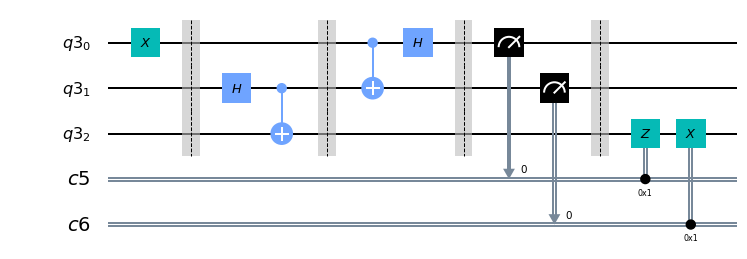

In [194]:
def gateTransform(circuit,targetQubit,crz,crx):
    circuit.barrier()
    #circuit.cx(1,2)
    #circuit.cz(0,2)
    circuit.z(targetQubit).c_if(crz,1)
    circuit.x(targetQubit).c_if(crx,1)
    circuit.draw(output='mpl')

gateTransform(circuit,2,crz,crx)
circuit.draw(output='mpl')

## Results Visualization

As you can see, we have a 100% chance of ensuring the measurement of Qubit_2 to be in the state |1>. 

Hence, we have successsfully teleported the state from Qubit_0 to Qubit_2.

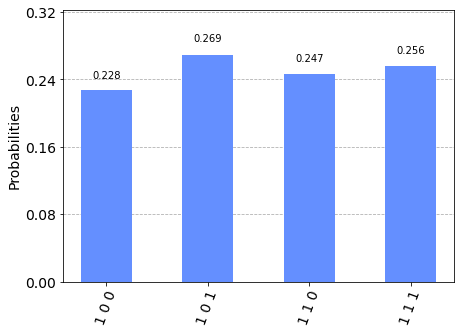

In [196]:
crResult = qk.ClassicalRegister(1) # Adding in another classical register to view results
circuit.add_register(crResult)
circuit.measure(2,2)
circuit.draw(output='mpl')

simulator = qk.Aer.get_backend('qasm_simulator')
result = qk.execute(circuit, backend = simulator, shots = 1000).result()
counts = result.get_counts()
plot_histogram(counts)

## IBM quantum run
Now, once again, let us hook up to our nearest IBM quantum computer and run the simulation!

Job Status: job has successfully run


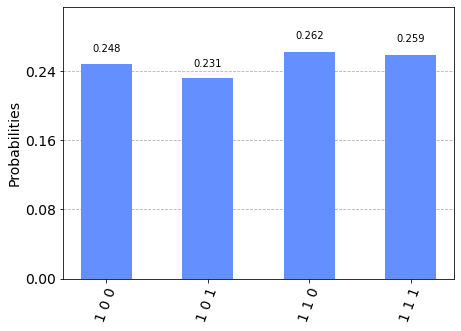

In [197]:
job = qk.execute(circuit, backend = backend)
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(circuit))